# Задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

# Как прогнозирование температуры поможет экономить?

При управлении нагревом можно будет подставлять
разные параметры и смотреть на результат. И
корректировать параметры так, чтобы избегать
лишнего нагрева.
Обратная задача (предсказать параметры по
температуре) слишком сложная, поэтому не
рассматриваем.
Можно сказать, что с помощью модели будет
происходить имитация технологического процесса.
Т.е. мы с можем воспроизводить процесс(эксперимент)
с помощью математической модели, и тестировать
только лучшие результаты, также можем выделить
наиболее важные признаки влияющие на нагрев и
конечную температуру.

# Описание данных

- data_arc_new.csv — данные об электродах;
- data_bulk_new.csv — данные о подаче сыпучих материалов (объём);
- data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);
- data_gas_new.csv — данные о продувке сплава газом;
- data_temp_new.csv — результаты измерения температуры;
- data_wire_new.csv — данные о проволочных материалах (объём);
- data_wire_time_new.csv — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

#  Анализ данных

## Импорт данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
try:
    data_arc_new = pd.read_csv('/Users/pashc/Downloads/data_arc_new.csv')
    data_bulk_new = pd.read_csv('/Users/pashc/Downloads/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('/Users/pashc/Downloads/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('/Users/pashc/Downloads/data_gas_new.csv')
    data_temp_new = pd.read_csv('/Users/pashc/Downloads/data_temp_new.csv')
    data_wire_new = pd.read_csv('/Users/pashc/Downloads/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('/Users/pashc/Downloads/data_wire_time_new.csv')

except:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    data_gas_new = pd.read_csv('/datasets/data_gas_new.csv')
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')

## Данные об электродах

In [ ]:
data_arc_new.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


Видим, что необходимо поменять название столбцов, поскольку они на русском языке и с пробелами, что будет неудобно в будущей работе над проектом

In [ ]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Пропусков в данных нет, но можно заметить неверные типы данных в столбцах: начало нагрева дугой, конец нагрева дугой.

In [ ]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


Можно заметить, что есть аномальное значение - отрицательное минимальное значение. Более того, достаточно большой разрыв между максимальным значением и 75 квантилем.

Text(0.5, 1.0, 'Активная мощность')

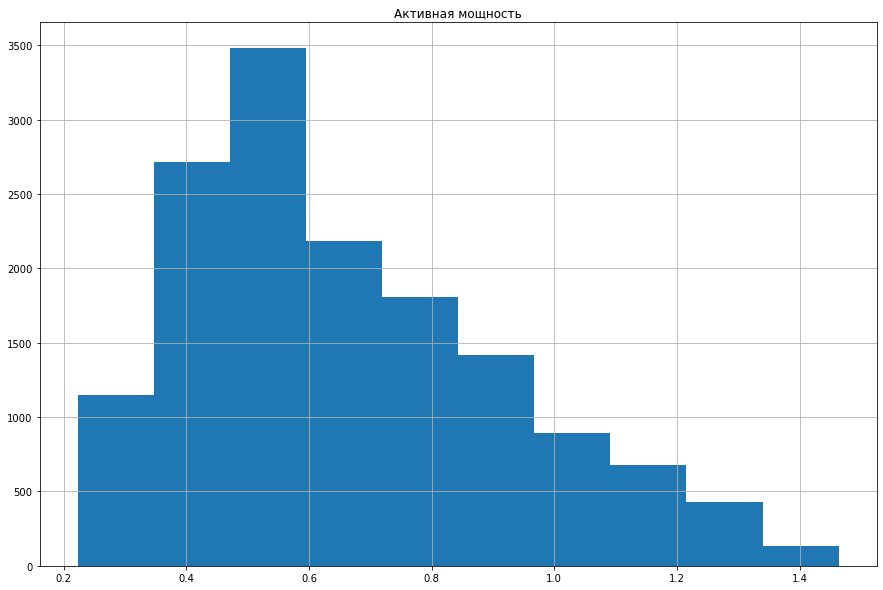

In [ ]:
data_arc_new['Активная мощность'].hist(figsize=(15, 10))
plt.title('Активная мощность')

Text(0.5, 1.0, 'Реактивная мощность')

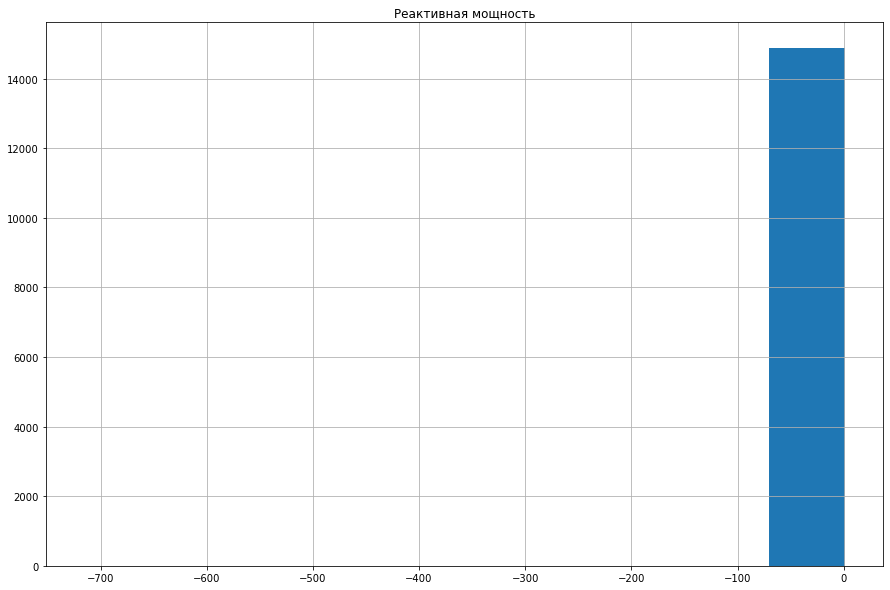

In [ ]:
data_arc_new['Реактивная мощность'].hist(figsize=(15, 10))
plt.title('Реактивная мощность')

In [ ]:
data_arc_new.sort_values(by = ['Реактивная мощность']).head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
709,152,2019-05-09 11:26:58,2019-05-09 11:29:41,0.228852,0.153777
3290,711,2019-05-31 07:16:01,2019-05-31 07:20:05,0.242989,0.153921
11794,2567,2019-08-13 05:51:16,2019-08-13 05:52:22,0.288314,0.155221
6130,1336,2019-06-22 15:46:26,2019-06-22 15:47:50,0.244191,0.156525


Отрицательное значение тольео одно, поэтому это значение-выброс. Его необходимо заменить.

## Данные о подаче сыпучих материалов

In [ ]:
data_bulk_new.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [ ]:
data_bulk_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


array([[<AxesSubplot:title={'center':'Bulk 1'}>,
        <AxesSubplot:title={'center':'Bulk 2'}>,
        <AxesSubplot:title={'center':'Bulk 3'}>,
        <AxesSubplot:title={'center':'Bulk 4'}>],
       [<AxesSubplot:title={'center':'Bulk 5'}>,
        <AxesSubplot:title={'center':'Bulk 6'}>,
        <AxesSubplot:title={'center':'Bulk 7'}>,
        <AxesSubplot:title={'center':'Bulk 8'}>],
       [<AxesSubplot:title={'center':'Bulk 9'}>,
        <AxesSubplot:title={'center':'Bulk 10'}>,
        <AxesSubplot:title={'center':'Bulk 11'}>,
        <AxesSubplot:title={'center':'Bulk 12'}>],
       [<AxesSubplot:title={'center':'Bulk 13'}>,
        <AxesSubplot:title={'center':'Bulk 14'}>,
        <AxesSubplot:title={'center':'Bulk 15'}>, <AxesSubplot:>]],
      dtype=object)

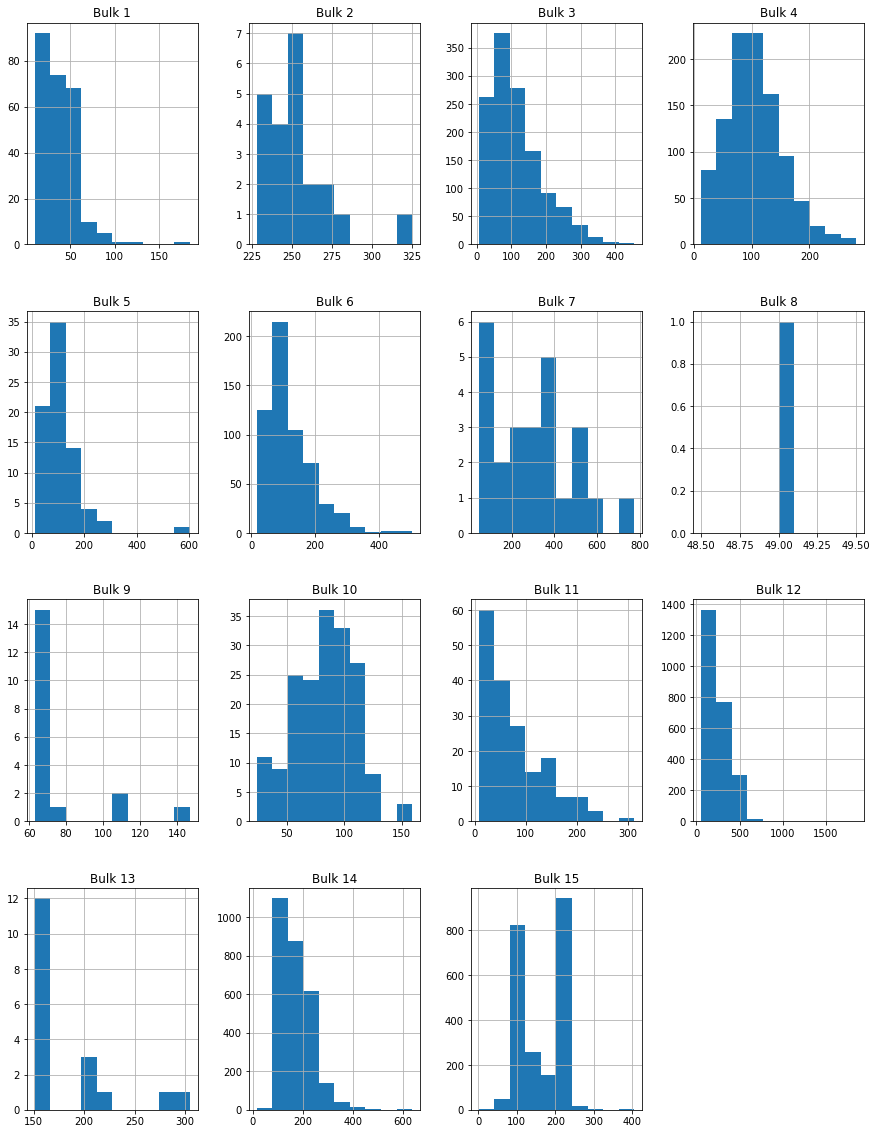

In [ ]:
hist_bulk = data_bulk_new.drop(columns = ['key'])
hist_bulk.hist(figsize=(15, 20))

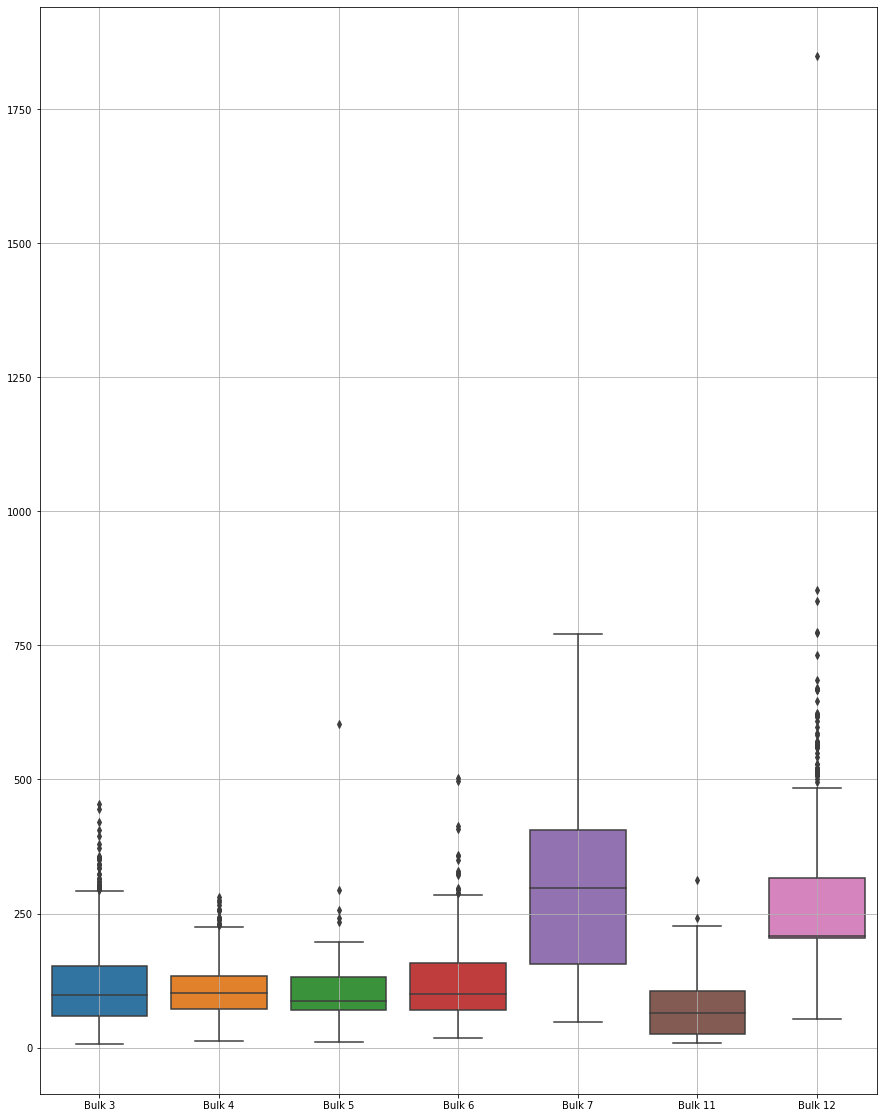

In [ ]:
plt.figure(figsize=(15,20))
sns.boxplot(data = hist_bulk[['Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 11', 'Bulk 12']])
plt.grid()

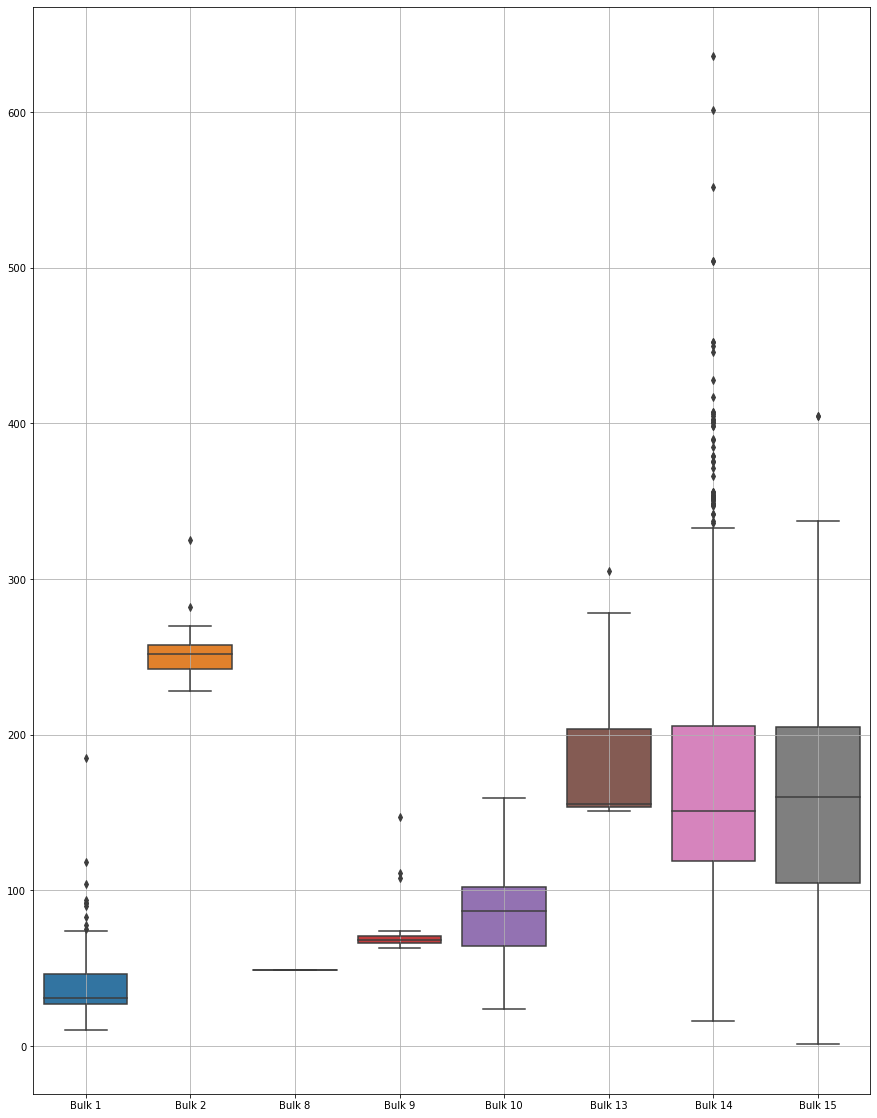

In [ ]:
plt.figure(figsize=(15,20))
sns.boxplot(data = hist_bulk[['Bulk 1', 'Bulk 2', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 13', 'Bulk 14', 'Bulk 15']])
plt.grid()

In [ ]:
data_bulk_time_new.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


In [ ]:
data_bulk_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Структура данных одинаковая, пропущенные данные скорее всего означают, что сыпучий материал не использовался в процессе производства какой-либо партии. Поэтому будет необходимо заменить на ноль.

## Данные о продувке сплава газом

In [ ]:
data_gas_new.head(10)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [ ]:
data_gas_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [ ]:
data_gas_new.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


<AxesSubplot:>

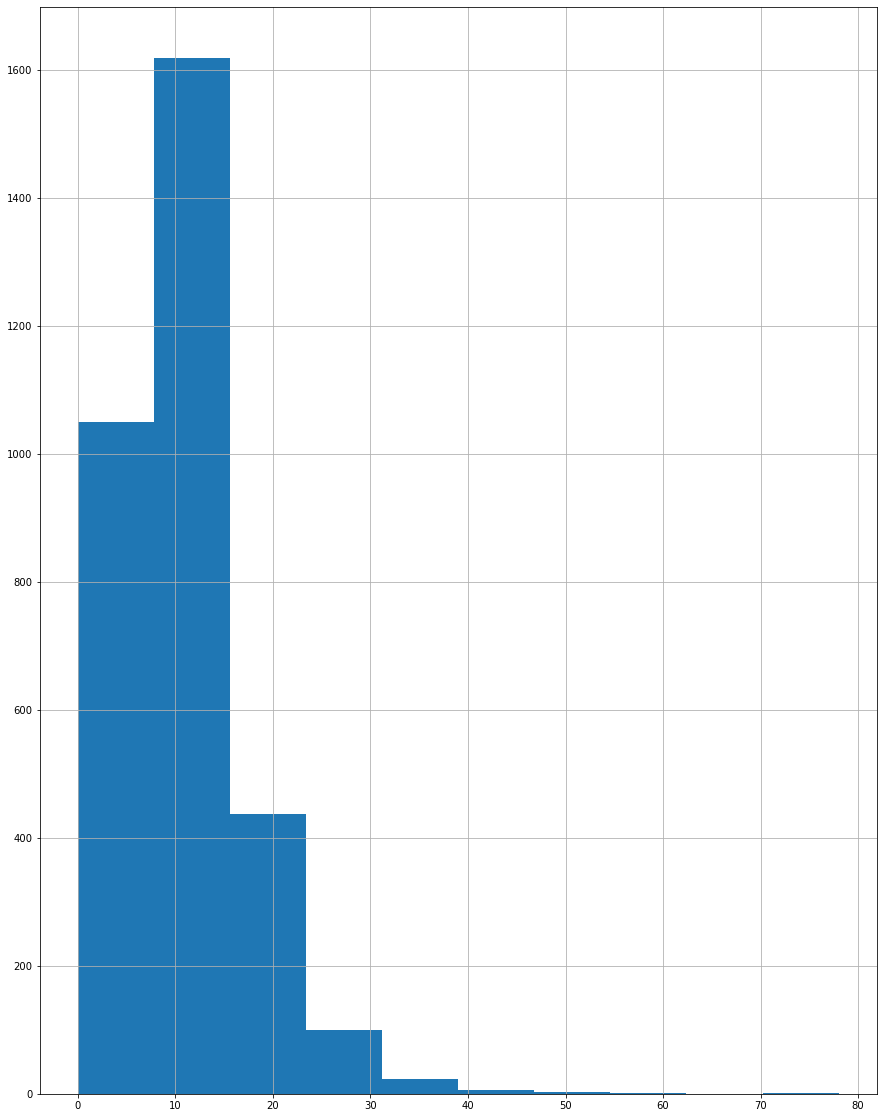

In [ ]:
data_gas_new['Газ 1'].hist(figsize=(15, 20))

Здесь нет ничего необычного в данных, поэтому стоит только переименовать столбец

## Данные о результатах измерения температуры

In [ ]:
data_temp_new.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [ ]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [ ]:
data_temp_new.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


<AxesSubplot:>

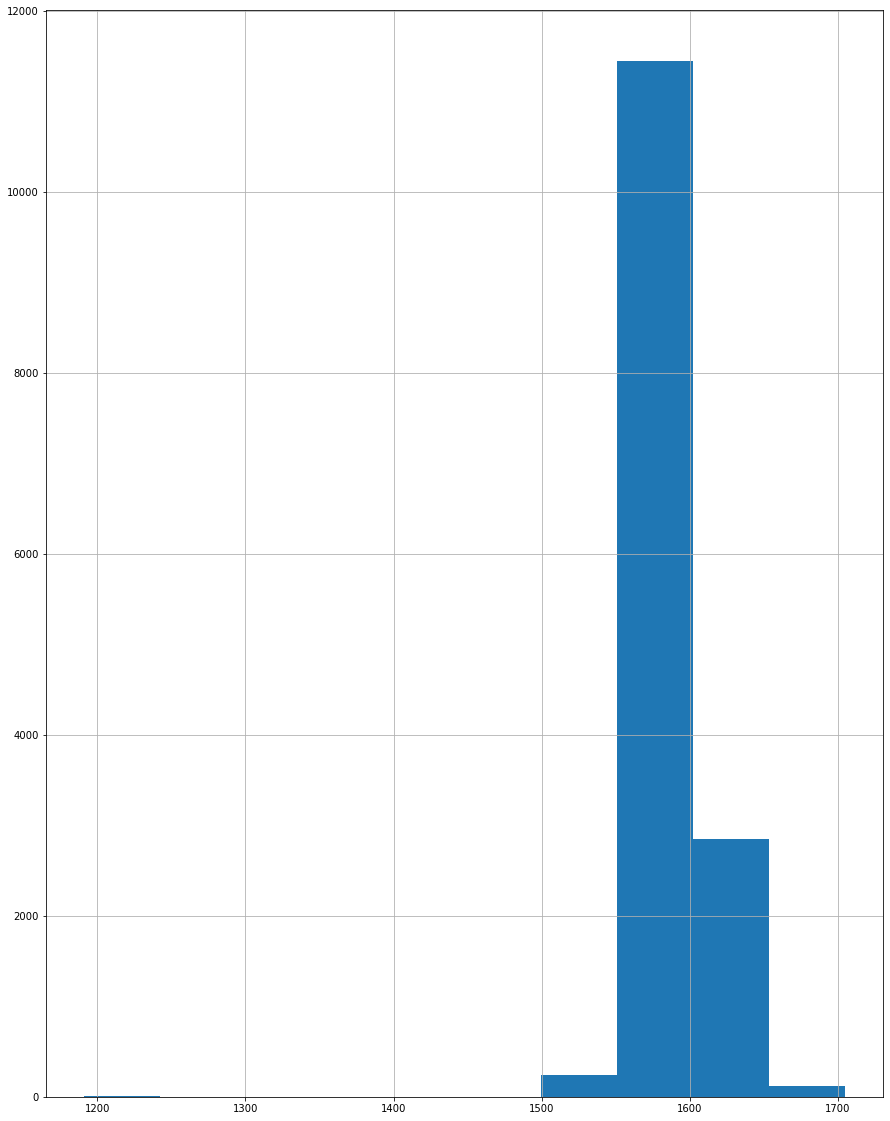

In [ ]:
data_temp_new['Температура'].hist(figsize=(15, 20))

Есть пропущенные значения, а также неверные тип данных времени замера

In [ ]:
data_temp_new.Температура.unique()

array([1571., 1604., 1618., 1601., 1606., 1613., 1581., 1577., 1589.,
       1602., 1596., 1597., 1598., 1599., 1600., 1623., 1617., 1625.,
       1576., 1592., 1586., 1543., 1582., 1595., 1587., 1574., 1580.,
       1585., 1593., 1616., 1608., 1583., 1588., 1591., 1610., 1621.,
       1615., 1619., 1605., 1607., 1611., 1590., 1609., 1584., 1603.,
       1579., 1626., 1560., 1563., 1594., 1612., 1578., 1566., 1572.,
       1575., 1567., 1562., 1564., 1614., 1573., 1570., 1538., 1556.,
       1542., 1565., 1660., 1659., 1654., 1690., 1652., 1666., 1667.,
       1669., 1668., 1642., 1658., 1671., 1630., 1655., 1663., 1635.,
       1656., 1641., 1631., 1653., 1648., 1569., 1559., 1558., 1548.,
       1541., 1553., 1662., 1679., 1637., 1644., 1622., 1624., 1649.,
       1629., 1643., 1526., 1550., 1561., 1557., 1544., 1568., 1620.,
       1645., 1647., 1638., 1547., 1627., 1628., 1551., 1549., 1650.,
       1684., 1634., 1651., 1633., 1640., 1554., 1532., 1632., 1704.,
       1705., 1700.,

Видно также выбросы после значения температуры 1700 и меньше 1500, более того, необходимо удалить пропущенные значения.

## Данные о проволочных материалах

In [ ]:
data_wire_new.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_wire_time_new.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_wire_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [ ]:
data_wire_time_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [ ]:
data_wire_new.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [ ]:
 data_wire_hist= data_wire_new.drop(columns = ['key'])

array([[<AxesSubplot:title={'center':'Wire 1'}>,
        <AxesSubplot:title={'center':'Wire 2'}>,
        <AxesSubplot:title={'center':'Wire 3'}>],
       [<AxesSubplot:title={'center':'Wire 4'}>,
        <AxesSubplot:title={'center':'Wire 5'}>,
        <AxesSubplot:title={'center':'Wire 6'}>],
       [<AxesSubplot:title={'center':'Wire 7'}>,
        <AxesSubplot:title={'center':'Wire 8'}>,
        <AxesSubplot:title={'center':'Wire 9'}>]], dtype=object)

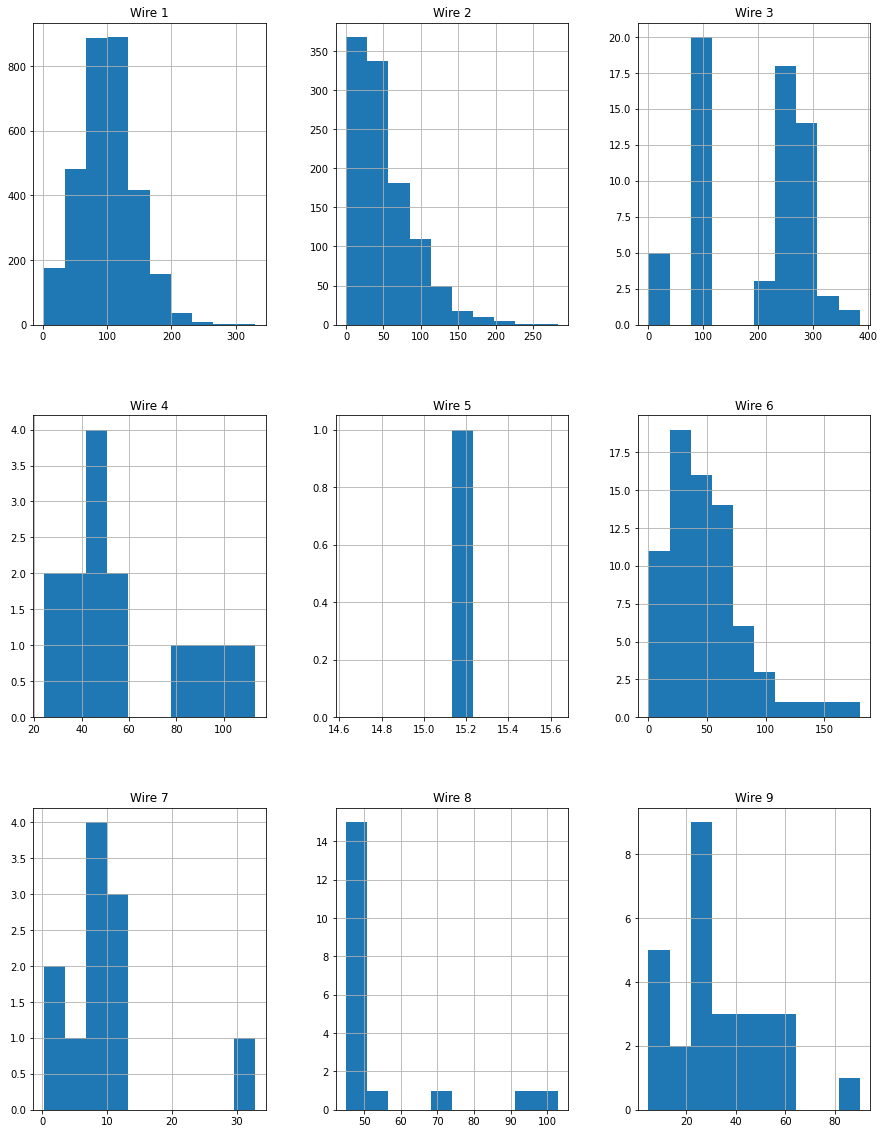

In [ ]:
data_wire_hist.hist(figsize=(15, 20))

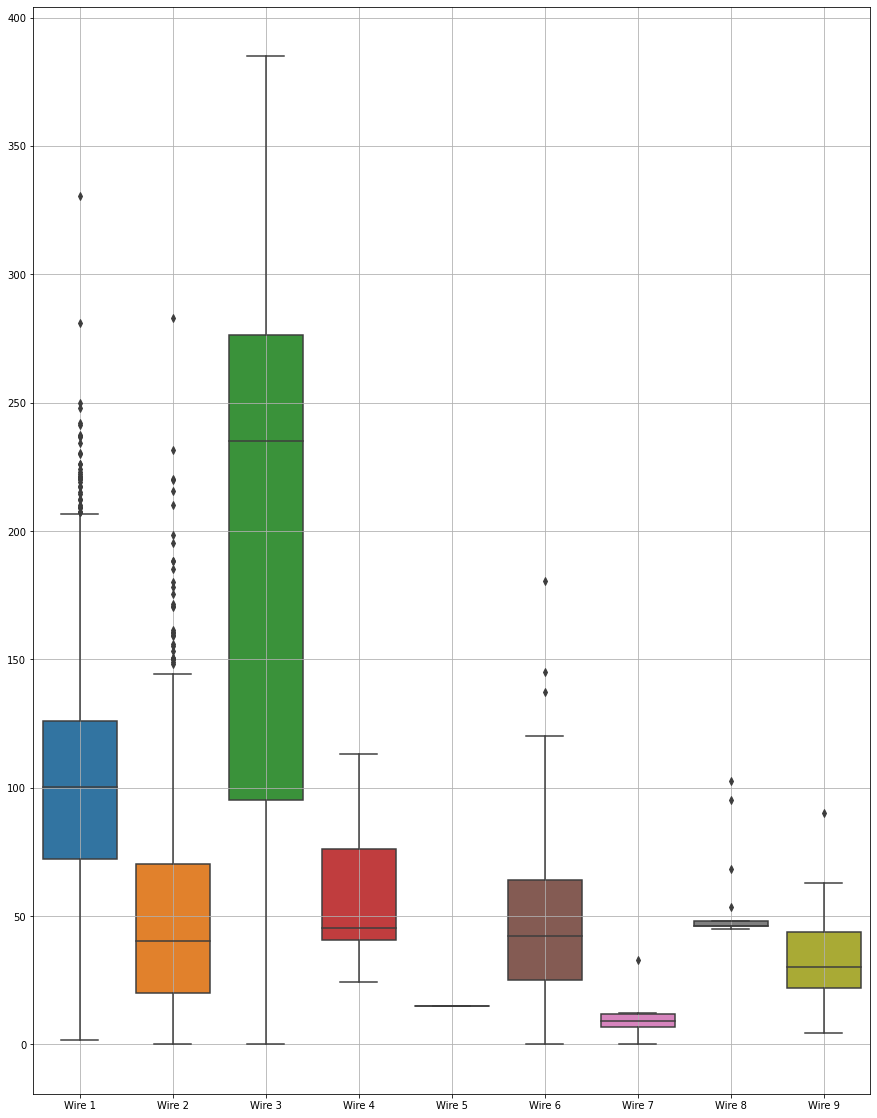

In [ ]:
plt.figure(figsize=(15,20))
sns.boxplot(data = data_wire_hist)
plt.grid()

Были обнаружены пропущенные значения в данных, также структура хранения одинакова

# План проекта

1) Описание проекта: задача проекта, описание этапа обработки, объяснение эффективности прогнозирования, описание данных.

2) Изучение и подготовка данных:
 - Выгрузка данных: импорт необходимых библиотек, импорт данных.
 - Анализ данных: изучение всех данных, для дальнейшей предобработки.
 - Предобработка данных:
    - data_arc_new (переименование столбцов,изменение типов данных,удаление выбросов)
    - data_bulk_new, data_bulk_time_new(обработка пропусков)
    - data_gas_new(переименование столбцов)
    - data_temp_new(переименование столбцов,изменение типов данных,удаление выбросов)
    - data_wire_new(), data_wire_time_new(обработка пропусков)
    - объединение таблицы по ключу

3) Обучение моделей(линейная регрессия, случайный лес, CatBoostRegressor), получение мае не выше 6,8

4) Тестирование модели, показавшей наилучший результат

5) Итоговый вывод и создание отчета(краткое описание всех проделанных этапов, заключение)

# Предобработка данных

## Переименование столбцов

In [ ]:
data_arc_new.columns = ['key', 'start_time_heating','end_time_heating', 'active_power', 'reactive_power']
data_gas_new.columns = ['key', 'gas_1']
data_temp_new.columns = ['key', 'measurement_time','temperature']

##### Проверяем изменения

In [ ]:
data_arc_new.head()

,key,start_time_heating,end_time_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [ ]:
data_gas_new.head()

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [ ]:
data_temp_new.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


## Удаление выбросов

In [ ]:
data_arc_new = data_arc_new.query('reactive_power > 0')

### Количество измерений в партии

In [ ]:
data_temperature = data_temp_new.drop(columns = ['temperature'])
data_temperature = data_temperature['key'].value_counts()
data_temperature = pd.DataFrame(data_temperature)
data_temperature = data_temperature.reset_index()
data_temperature.columns = ['Партии', 'Количество']

In [ ]:
data_temperature

,Партии,Количество
0,2108,17
1,1513,16
2,1689,16
3,2567,15
4,46,14
...,...,...
3211,247,2
3212,1169,2
3213,246,2
3214,195,1


array([[<AxesSubplot:title={'center':'Количество'}>]], dtype=object)

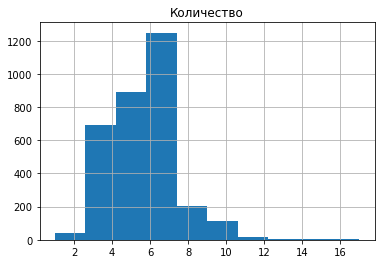

In [ ]:
data_temperature.hist('Количество')

In [ ]:
data_temp_new['key'].value_counts()

2108    17
1513    16
1689    16
2567    15
46      14
        ..
247      2
1169     2
246      2
195      1
279      1
Name: key, Length: 3216, dtype: int64

Необходимо удалить данные ио температуре с ключем 195 и 279, поскольку там количество измерений температуре непольное - то есть равно одному.

In [ ]:
data_temp_new.query('temperature < 1500')

,key,measurement_time,temperature
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


In [ ]:
data_temp_new = data_temp_new.query('key != 867')
data_temp_new = data_temp_new.query('key != 1214')
data_temp_new = data_temp_new.query('key != 1619')
data_temp_new = data_temp_new.query('key != 2052')
data_temp_new = data_temp_new.query('key != 195')
data_temp_new = data_temp_new.query('key != 279')
data_temp_new = data_temp_new.query('key < 2500')

##### Проверяем изменения

In [ ]:
data_arc_new.sort_values(by = ['reactive_power']).head()

,key,start_time_heating,end_time_heating,active_power,reactive_power
709,152,2019-05-09 11:26:58,2019-05-09 11:29:41,0.228852,0.153777
3290,711,2019-05-31 07:16:01,2019-05-31 07:20:05,0.242989,0.153921
11794,2567,2019-08-13 05:51:16,2019-08-13 05:52:22,0.288314,0.155221
6130,1336,2019-06-22 15:46:26,2019-06-22 15:47:50,0.244191,0.156525
9014,1954,2019-07-21 06:26:02,2019-07-21 06:29:01,0.235934,0.157519


In [ ]:
data_temp_new.temperature.unique()

array([1571., 1604., 1618., 1601., 1606., 1613., 1581., 1577., 1589.,
       1602., 1596., 1597., 1598., 1599., 1600., 1623., 1617., 1625.,
       1576., 1592., 1586., 1543., 1582., 1595., 1587., 1574., 1580.,
       1585., 1593., 1616., 1608., 1583., 1588., 1591., 1610., 1621.,
       1615., 1619., 1605., 1607., 1611., 1590., 1609., 1584., 1603.,
       1579., 1626., 1560., 1563., 1594., 1612., 1578., 1566., 1572.,
       1575., 1567., 1562., 1564., 1614., 1573., 1570., 1538., 1556.,
       1542., 1565., 1660., 1659., 1654., 1690., 1652., 1666., 1667.,
       1669., 1668., 1642., 1658., 1671., 1630., 1655., 1663., 1635.,
       1656., 1641., 1631., 1653., 1648., 1569., 1559., 1558., 1548.,
       1541., 1553., 1662., 1679., 1637., 1644., 1622., 1624., 1649.,
       1629., 1643., 1526., 1550., 1561., 1557., 1544., 1568., 1620.,
       1645., 1647., 1638., 1547., 1627., 1628., 1551., 1549., 1650.,
       1684., 1634., 1651., 1633., 1640., 1554., 1532., 1632., 1704.,
       1705., 1700.,

## Изменение типов данных

In [ ]:
data_arc_new['start_time_heating'] = pd.to_datetime(data_arc_new['start_time_heating'])
data_arc_new['end_time_heating'] = pd.to_datetime(data_arc_new['end_time_heating'])
data_temp_new['measurement_time'] = pd.to_datetime(data_temp_new['measurement_time'])

##### Проверяем изменения

In [ ]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   key                 14875 non-null  int64         
 1   start_time_heating  14875 non-null  datetime64[ns]
 2   end_time_heating    14875 non-null  datetime64[ns]
 3   active_power        14875 non-null  float64       
 4   reactive_power      14875 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.3 KB


In [ ]:
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13903 non-null  int64         
 1   measurement_time  13903 non-null  datetime64[ns]
 2   temperature       13903 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 434.5 KB


## Заполенение пропусков

In [ ]:
data_wire_time_new = data_wire_time_new.fillna(0)
data_bulk_new = data_bulk_new.fillna(0)
data_bulk_time_new = data_bulk_time_new.fillna(0)
data_wire_new = data_wire_new.fillna(0)

In [ ]:
data_bulk_new = data_bulk_new[['key','Bulk 3','Bulk 4','Bulk 6','Bulk 7','Bulk 8','Bulk 9','Bulk 10','Bulk 11', 'Bulk 12','Bulk 13', 'Bulk 14', 'Bulk 15']]
data_wire_new = data_wire_new[['key', 'Wire 1', 'Wire 2','Wire 3','Wire 4','Wire 5','Wire 6','Wire 7','Wire 8','Wire 9']]

Нам необходимо удалить чать уникальных химических добавок, поскольку очень много пропусков, которые не нужны для дальнейшего исследования.

##### Проверяем изменения

In [ ]:
data_wire_time_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,0,0,0,0,0,0,0,0
1,2,2019-05-03 11:36:50,0,0,0,0,0,0,0,0
2,3,2019-05-03 12:11:46,0,0,0,0,0,0,0,0
3,4,2019-05-03 12:43:22,0,0,0,0,0,0,0,0
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,0,0,0,0,0,0,0


In [ ]:
data_temp_new

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0


In [ ]:
data_bulk_new.head()

,key,Bulk 3,Bulk 4,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [ ]:
data_bulk_time_new.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,0,0,0,2019-05-03 11:28:48,0,0,0,0,0,0,0,2019-05-03 11:24:31,0,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,0,0,0,2019-05-03 11:36:50,0,0,0,0,0,0,0,2019-05-03 11:53:30,0,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,0,0,0,2019-05-03 12:32:39,0,0,0,0,0,0,0,2019-05-03 12:27:13,0,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,0,0,0,2019-05-03 12:43:22,0,0,0,0,0,0,0,2019-05-03 12:58:00,0,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,0,0,0,2019-05-03 13:30:47,0,0,0,0,0,0,0,2019-05-03 13:30:47,0,2019-05-03 13:34:12,2019-05-03 13:30:47


In [ ]:
data_wire_new.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Добавление признаков для улучшения обучения модели

Если брать для обучения модели реактивную и активнную мощность, то может возникнуть мультиколлениарность признаков, поэтому можно добавить полную мощность, исходя из данных активной и реактивной мощности.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
data_arc_new['total_power'] = np.sqrt(data_arc_new['active_power'] ** 2 + data_arc_new['reactive_power'] ** 2)

Также нам не пригодится информация о времени, поскольку она в неправильном виде, поэтому можно расчитать разницу и перевести все в секунды

In [ ]:
data_arc_new['time_heating_sec'] = (data_arc_new['end_time_heating'] - data_arc_new['start_time_heating']).dt.total_seconds()
data_arc_new = data_arc_new.groupby('key').sum()

##### Проверяем изменения

In [ ]:
data_arc_new

,active_power,reactive_power,total_power,time_heating_sec
key,,,,
1,3.036730,2.142821,3.718736,1098.0
2,2.139408,1.453357,2.588349,811.0
3,4.063641,2.937457,5.019223,655.0
4,2.706489,2.056992,3.400038,741.0
5,2.252950,1.687991,2.816980,869.0
...,...,...,...,...
3237,2.541872,2.025417,3.250657,909.0
3238,1.374821,1.038103,1.723937,546.0
3239,4.848005,3.541541,6.014480,1216.0


## Целевой признак

In [ ]:
data_temp = data_temp_new.groupby(by ='key').agg(['first', 'last']).reset_index()
data_temp.columns = ['key','measurement_first','measurement_last','temperature_first','temperature_last']

##### Проверяем изменения

In [ ]:
data_temp

,key,measurement_first,measurement_last,temperature_first,temperature_last
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0
...,...,...,...,...,...
2466,2495,2019-08-10 11:27:47,2019-08-10 11:50:47,1570.0,1591.0
2467,2496,2019-08-10 11:56:48,2019-08-10 12:25:13,1554.0,1591.0
2468,2497,2019-08-10 12:37:26,2019-08-10 12:53:28,1571.0,1589.0
2469,2498,2019-08-10 12:58:11,2019-08-10 13:23:31,1591.0,1594.0


In [ ]:
data_temp.query('temperature_first < 1500')

,key,measurement_first,measurement_last,temperature_first,temperature_last


In [ ]:
data_temp.query('temperature_last < 1500')

,key,measurement_first,measurement_last,temperature_first,temperature_last


In [ ]:
data_arc_new

,active_power,reactive_power,total_power,time_heating_sec
key,,,,
1,3.036730,2.142821,3.718736,1098.0
2,2.139408,1.453357,2.588349,811.0
3,4.063641,2.937457,5.019223,655.0
4,2.706489,2.056992,3.400038,741.0
5,2.252950,1.687991,2.816980,869.0
...,...,...,...,...
3237,2.541872,2.025417,3.250657,909.0
3238,1.374821,1.038103,1.723937,546.0
3239,4.848005,3.541541,6.014480,1216.0


In [ ]:
data_arc = data_arc_new.groupby(by ='key').agg(['sum']).reset_index()
data_arc.columns = ['key','active_power_sum','reactive_power_sum', 'total_power_sum','time_heating_sum']

##### Проверяем изменения

In [ ]:
data_temp

,key,measurement_first,measurement_last,temperature_first,temperature_last
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0
...,...,...,...,...,...
2466,2495,2019-08-10 11:27:47,2019-08-10 11:50:47,1570.0,1591.0
2467,2496,2019-08-10 11:56:48,2019-08-10 12:25:13,1554.0,1591.0
2468,2497,2019-08-10 12:37:26,2019-08-10 12:53:28,1571.0,1589.0
2469,2498,2019-08-10 12:58:11,2019-08-10 13:23:31,1591.0,1594.0


In [ ]:
data_arc

,key,active_power_sum,reactive_power_sum,total_power_sum,time_heating_sum
0,1,3.036730,2.142821,3.718736,1098.0
1,2,2.139408,1.453357,2.588349,811.0
2,3,4.063641,2.937457,5.019223,655.0
3,4,2.706489,2.056992,3.400038,741.0
4,5,2.252950,1.687991,2.816980,869.0
...,...,...,...,...,...
3209,3237,2.541872,2.025417,3.250657,909.0
3210,3238,1.374821,1.038103,1.723937,546.0
3211,3239,4.848005,3.541541,6.014480,1216.0
3212,3240,3.317679,2.373552,4.082920,839.0


## Итоговая таблица

In [ ]:
data = data_arc.merge(data_bulk_new, how = 'inner', on = 'key')
data = data.merge(data_gas_new, how = 'inner', on = 'key')
data = data.merge(data_wire_new, how = 'inner', on = 'key')
data = data.merge(data_temp, how = 'inner', on = 'key')

##### Проверяем изменения

In [ ]:
data.head()

,key,active_power_sum,reactive_power_sum,total_power_sum,time_heating_sum,Bulk 3,Bulk 4,Bulk 6,Bulk 7,Bulk 8,...,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,measurement_first,measurement_last,temperature_first,temperature_last
0,1,3.036730,2.142821,3.718736,1098.0,0.0,43.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2.139408,1.453357,2.588349,811.0,0.0,73.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
2,3,4.063641,2.937457,5.019223,655.0,0.0,34.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
3,4,2.706489,2.056992,3.400038,741.0,0.0,81.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
4,5,2.252950,1.687991,2.816980,869.0,0.0,78.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   key                 2325 non-null   int64         
 1   active_power_sum    2325 non-null   float64       
 2   reactive_power_sum  2325 non-null   float64       
 3   total_power_sum     2325 non-null   float64       
 4   time_heating_sum    2325 non-null   float64       
 5   Bulk 3              2325 non-null   float64       
 6   Bulk 4              2325 non-null   float64       
 7   Bulk 6              2325 non-null   float64       
 8   Bulk 7              2325 non-null   float64       
 9   Bulk 8              2325 non-null   float64       
 10  Bulk 9              2325 non-null   float64       
 11  Bulk 10             2325 non-null   float64       
 12  Bulk 11             2325 non-null   float64       
 13  Bulk 12             2325 non-null   float64     

In [ ]:
data = data.drop(columns = ['key','measurement_last', 'measurement_first'])

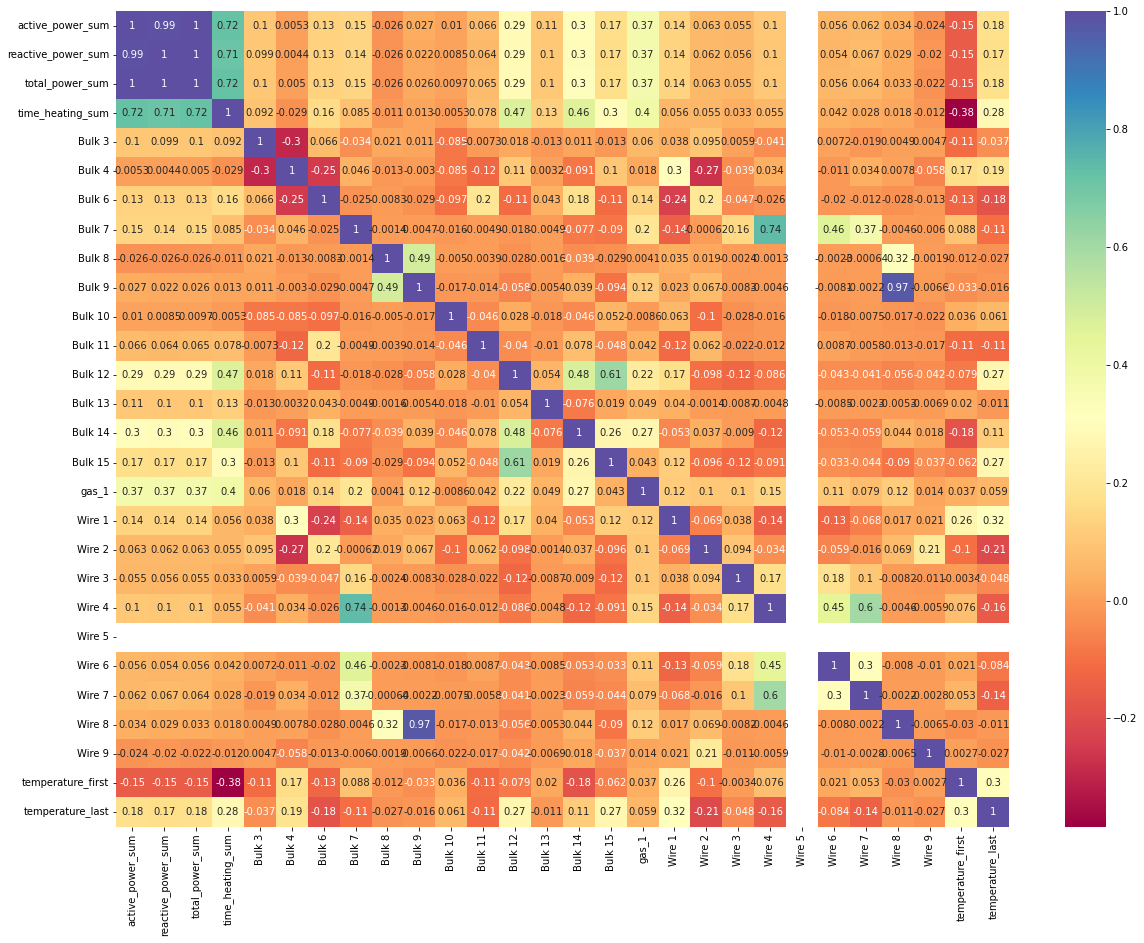

In [ ]:
plt.figure(figsize = (20,15))
data_plot = sns.heatmap(data.corr(), annot= True, cmap="Spectral")

Чтобы не возникла мультиколлинеарность в модели линейной регрессии удалим признаки, где коллеряция больше 0,9

In [ ]:
data = data.drop(columns = ['reactive_power_sum', 'active_power_sum', 'Wire 8', 'Wire 5'])

##### Проверяем изменения

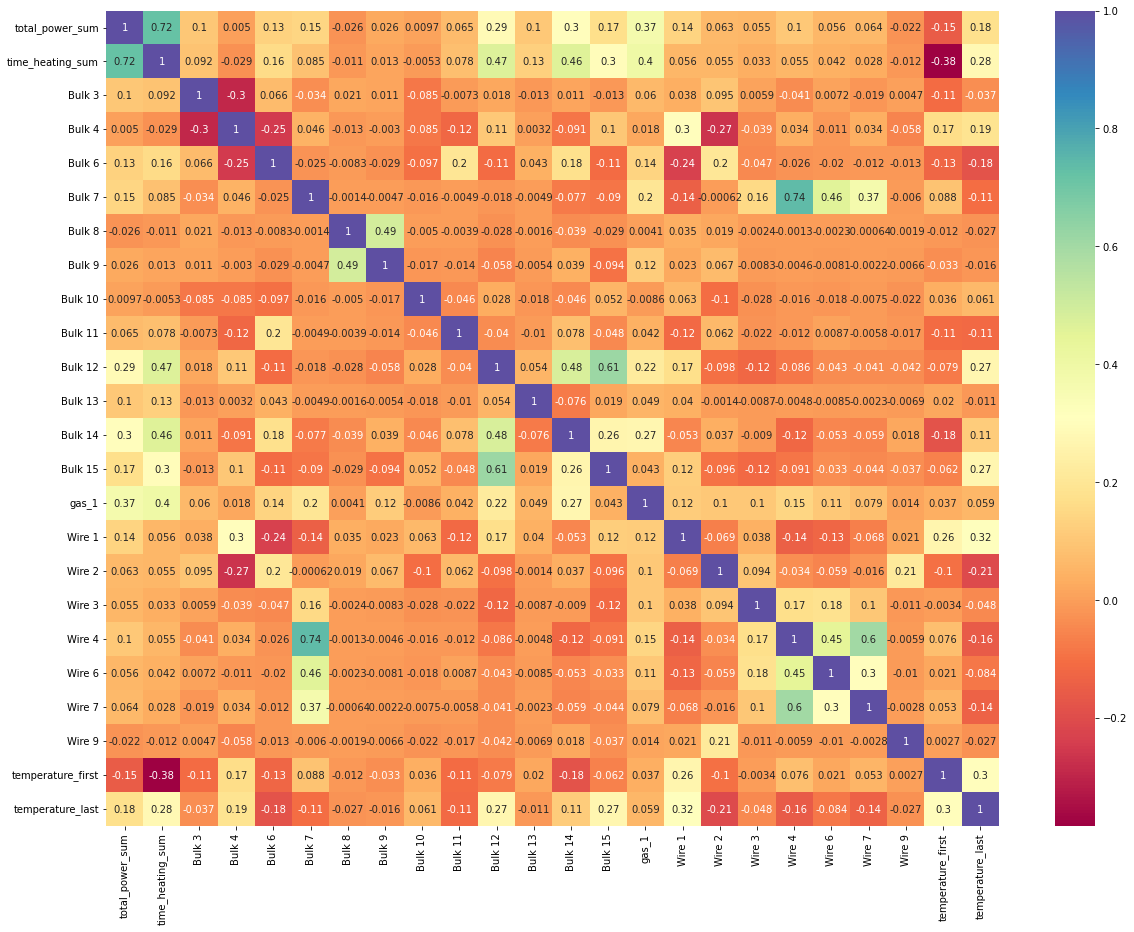

In [ ]:
plt.figure(figsize = (20,15))
data_plot = sns.heatmap(data.corr(), annot= True, cmap="Spectral")

## Создание признаков

In [ ]:
features = data.drop('temperature_last', axis=1)
target = data['temperature_last']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=60623)

## Масштабирование признаков

In [ ]:
numeric = ['total_power_sum','time_heating_sum','temperature_first','Bulk 3','Bulk 4','Bulk 6','Bulk 10','Bulk 11','Bulk 12','Bulk 14','Bulk 15','gas_1','Wire 1','Wire 2','Wire 3','Wire 6']
scaler = StandardScaler()
scaler.fit(features_test[numeric])

StandardScaler()

In [ ]:
features_train_copy = features_train.copy()
features_test_copy = features_test.copy()

In [ ]:
features_train_copy[numeric] = scaler.transform(features_train_copy[numeric])
features_test_copy[numeric] = scaler.transform(features_test_copy[numeric])

# Обучение моделей

In [ ]:
predictions = pd.Series(target_train.mean(), index=target_test.index)
mae = mean_absolute_error(target_test, predictions)
print(mae)

8.16808618864263


## Модель CatBoost

In [ ]:
model = CatBoostRegressor(verbose=False, random_state=60623)
score = cross_val_score(model, features_train, target_train, cv=5, scoring='neg_mean_absolute_error')
print('MAE:', score.mean()*-1)

MAE: 6.331582917930025


## Модель случайного леса

In [ ]:
for depth in range(1,10):
    for est in range(100,500,50):
        model = RandomForestRegressor(max_depth=depth, n_estimators=est, random_state=60623)
        model.fit(features_train, target_train)
        score = cross_val_score(model, features_train, target_train, scoring = 'neg_mean_absolute_error')
        print('Количество деревьев:', est, "Глубина",depth)
        print("MAE: ", score.mean()*-1)

Количество деревьев: 100 Глубина 1
MAE:  7.690433423026386
Количество деревьев: 150 Глубина 1
MAE:  7.689390446834376
Количество деревьев: 200 Глубина 1
MAE:  7.689074566132021
Количество деревьев: 250 Глубина 1
MAE:  7.687521506521475
Количество деревьев: 300 Глубина 1
MAE:  7.6849458281885905
Количество деревьев: 350 Глубина 1
MAE:  7.685903107361431
Количество деревьев: 400 Глубина 1
MAE:  7.687452162056812
Количество деревьев: 450 Глубина 1
MAE:  7.686747651692569
Количество деревьев: 100 Глубина 2
MAE:  7.260578510648804
Количество деревьев: 150 Глубина 2
MAE:  7.2526250031649955
Количество деревьев: 200 Глубина 2
MAE:  7.2551397527971755
Количество деревьев: 250 Глубина 2
MAE:  7.26130700060906
Количество деревьев: 300 Глубина 2
MAE:  7.26175151312417
Количество деревьев: 350 Глубина 2
MAE:  7.2575365835746055
Количество деревьев: 400 Глубина 2
MAE:  7.257314224319183
Количество деревьев: 450 Глубина 2
MAE:  7.259219505462946
Количество деревьев: 100 Глубина 3
MAE:  6.91171347233

## Модель LinearRegression

In [ ]:
model =  LinearRegression()
model.fit(features_train_copy , target_train)
score = cross_val_score(model,features_train_copy, target_train,scoring = 'neg_mean_absolute_error')
print('MAE:', score.mean()*-1)

MAE: 6.394332437712279


# Тестирование модели

In [ ]:
model = RandomForestRegressor(max_depth=9, n_estimators=450, random_state=50623)
model.fit(features_train, target_train)
predict = model.predict(features_test)
score = mean_absolute_error(predict, target_test)
print('MAE:', round(score, 2))

MAE: 6.29


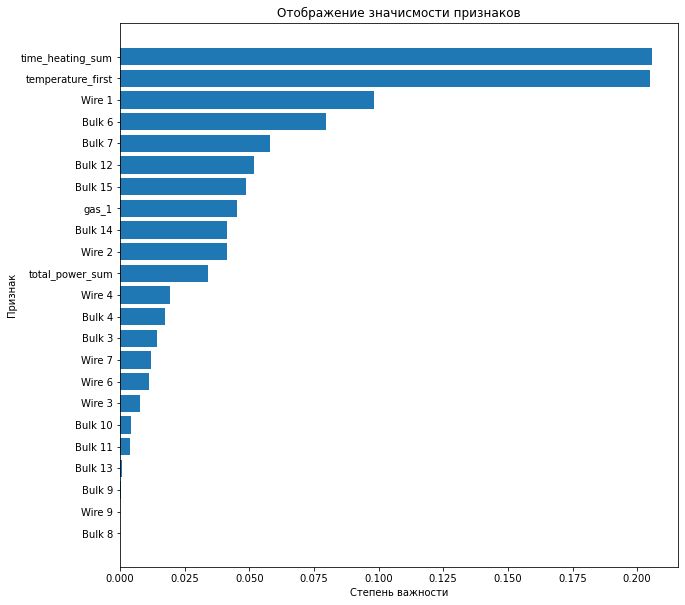

In [ ]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)
feature_names = features.columns

plt.figure(figsize=(10, 10))
plt.barh(range(len(importances)), importances[sorted_indices])
plt.yticks(range(len(importances)), feature_names[sorted_indices])
plt.xlabel('Степень важности')
plt.ylabel('Признак')
plt.title('Отображение значисмости признаков')
plt.show()

# Финанльный вывод

В результате выполнения проекта были выполнены следующие этапы:

- Выгрузка данных: импорт необходимых библиотек, импорт данных.

- Анализ данных: изучение всех данных и последующий их анализ, где были выявлены проблемы в типах данных, пропуски, выбросы, название столбцов)

- Предобработка данных: изменены типы данных в data_arc_new, data_temp_new; обработаны пропуски в data_bulk_new, data_bulk_time_new,data_wire_new, data_wire_time_new; удалены выбросы в data_arc_new, data_temp_new.

- Обучение моделей(линейная регрессия, случайный лес, CatBoostRegressor), получение мае не выше 6,8

- Тестирование модели Случайного леса с мае 6.29


<h1>Отчет</h1>

<h2>Содержание отчета</h2>

<font size=4>В отчете представленно описание работы по анализу данных и построения модели предсказания температуры плавки стали на осневе анализа.<font>

<h2>Цель проекта и определение проблемы</h2>

<font size=3>
В металлургическом комбинате необходимо оптимизировать производственные расходы, поскольку слишком большое потребление электроэнергии на этапе обработки стали.<br>
    <br>
Разработнная модель позволяет имитировать технологический процесс. Это означает, что мы можем воспроизводить процесс или эксперимент с помощью математической модели и тестировать только наилучшие результаты. Кроме того, мы можем выделить самые значимые признаки, которые влияют на нагрев и конечную температуру.<font>

<h2>Метрики</h2>

<font size=3>Метрикой разработнанной модели будет являться средняя абсолютная ошибка (MAE). Чем ближе MAE к нулю, тем точнее модель. Минимальный порог, а также значение MAE представленно ниже в таблице:<font>

| Комментарий  | Значения MAE  |
|--------------|---------------|
| Плохо        | MAE > 6.8     |
| Нормально    |6.3 < MAE ≤ 6.8|
| Хорошо       |6.0 < MAE ≤ 6.3|
| Отлично      | MAE ≤ 6.0     |

<h2>План проекта</h2>

<font size=3>
    
1) **Описание проекта:** задача проекта, описание этапа обработки, объяснение эффективности прогнозирования, описание данных.<br>
    
2) **Изучение и подготовка данных:**
    
Выгрузка данных: импорт необходимых библиотек, импорт данных.<br>
<br>   
Анализ данных: изучение всех данных, для дальнейшей предобработки.<br>
<br>
Предобработка данных:<br>
<ol>
<li>data_arc_new (переименование столбцов,изменение типов данных,удаление выбросов)</li>
<li>data_bulk_new, data_bulk_time_new(обработка пропусков)</li>
<li>data_gas_new(переименование столбцов)</li>
<li>data_temp_new(переименование столбцов,изменение типов данных,удаление выбросов)</li>
<li>data_wire_new(), data_wire_time_new(обработка пропусков)</li>
<li>объединение таблицы по ключу</li>
</ol>   
    
3) **Обучение моделей**(линейная регрессия, случайный лес, CatBoostRegressor), получение мае не выше 6,8

4) **Тестирование модели**, показавшей наилучший результат

5) **Итоговый вывод и создание отчета**(краткое описание всех проделанных этапов, заключение)<font>

<h2>Какие данные у нас есть</h2>

<font size=3>
    
**data_arc_new.csv** — данные об электродах;<br>
**data_bulk_new.csv** — данные о подаче сыпучих материалов (объём);<br>
**data_bulk_time_new.csv** — данные о подаче сыпучих материалов (время);<br>
**data_gas_new.csv** — данные о продувке сплава газом;<br>
**data_temp_new.csv** — результаты измерения температуры;<br>
**data_wire_new.csv** — данные о проволочных материалах (объём);<br>
**data_wire_time_new.csv** — данные о проволочных материалах (время).<font>

<h2>Этапы проекта</h2>

<h3>Анализ данных</h3>

<font size=3>
<ol>
<li>data_arc_new.csv - было обнаружено одно аномально отрицательное значение, неправильные типы данных </li>
<li>data_bulk_new.csv и data_bulk_time_new.csv - обнаружена одинаковая структура данных, а также пропущенные значения, которые означают, что сыпучий материал не использовался в процессе производства</li>
<li>data_gas_new.csv - здесь не было обнаружено каких либо проблем с данными</li>
<li>data_temp_new.csv - в данных были обнаружены выбросы и знаечния температуры ниже 1500, более того, пропущенные значения также были найдены</li>
<li>data_wire_new.csv и data_wire_time_new.csv - обнаружена одинаковая структура данных, а также пропущенные значения, которые означают, что проволочный материал не использовался в процессе производства</li>
</ol>
<font>

<h3>Предобработка данных</h3>

<h4>Удаление выбросов</h4>

<font size=3>
<ol>
<li>Отрицательное значение мощности было удалено, с помощью функции query() </li>
<li>Не были удалены выбросы температуры, поскольку промежуточные температуры встанут на место первой или последеней температуы в дальнейшей обработке. </li></ol><font>

<h4>Количество измерений в партии</h4>

<font size=3>
Было рассмотрено количество измерений температуры, чтобы удалить ненужные значения, которые могут привести к неправильной работе разработанной модели.
Так было принято решение удалить ключи, где температура измерялась только один раз, а также где значение температуры было ниже 1500 градусов.
<font>

<h4>Изменение типов данных</h4>

<font size=3>
<ol>
<li>data_arc_new - изменение данных start_time_heating, end_time_heating на datetime</li>
<li>data_temp_new - изменение данных measurement_time на datetime</li>    
</ol>
<font>

<h4>Заполенение пропусков</h4>

<font size=3>
В данных data_bulk_new, data_bulk_time_new, data_wire_new,data_wire_time_new пропущенные данные были заменены на 0
<font>

<h4>Добавление признаков для улучшения обучения модели</h4>

<font size=3>
Было рассмотрены два дополнительных признака:
    <br>
<ol>
<li>полная пощьность - вычисляется по формуле: $$s = √p^2 + q^2$$</li>
<br>    
<li> время плавления - вычисляется по формуле разности даты начала и конца плавления</li>
</ol><font>

<h4>Целевой признак</h4>

<font size=3>
Агрегация данных:
<br>
<ol>
<li>data_temp - агрегируем данные используя first и last </li>
<br>    
<li>data_arc - агрегируем данные используя sum</li>
</ol><font>

<h4>Итоговая таблица</h4>

<font size=3>Объединяем следующие таблицы: data_arc, data_bulk_new,data_gas_new,data_wire_new,data_temp.Остальные таблицы нам не нужны<font>

<h4>Исключение данных с высокой корреляцией</h4>

![image.png](attachment:image.png)

<font size=3>Были обнаружены данные, где корреляция больше 0,9 и данные где пустая корреляция из-за огромного количества нулевых значений. Поэтому были удалены следующие столбцы: 'reactive_power_sum', 'active_power_sum', 'Wire 8', 'Wire 5'<font>

<h3>Моделирование</h3>

<font size=3>
<ol>
<li>Создание признаков: целевым признаком является последняя тепература нагрева</li>
<li>Масштабирование признаков: необходимо масштабировать признаки для линейной регрессии, кроеме признака, являящимся целевым</li>
<li>Обучение модели: были выбраны 3 модели - модель случайного леса, CatBoost, LinearRegression</li>
<li>Тестирование модели: были выбрана модель, поскольку было достигнуто наименьшее MAE - 6.476081473143196. На тестовой выборке было достигнуто значение 6.29 </li>
<li>Оценка модели: была изучена важность признаков в модели случайного леса:</li>
</ol>
<font>

![image_2023-06-14_19-08-55.png](attachment:image_2023-06-14_19-08-55.png)

<h2>Итоги</h2>

<font size=3>**Благодаря исследованию, анализу данных, предобработке и моделированию модели была разработана модель предсказания температуры с зорошим значением MAE - 6,29**<font>

<font size=3><font>